In [7]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df= pd.DataFrame(pd.read_csv("Advertising.csv"))
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [14]:
df.drop_duplicates()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [15]:
df.dropna(inplace=True)


In [16]:
corr=df.corr(method='pearson')

In [17]:
corr

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# outliers

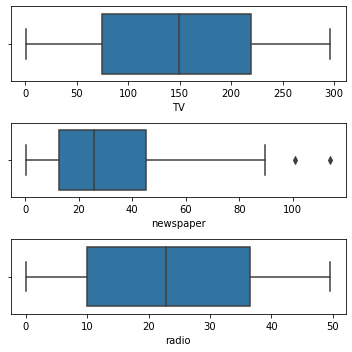

In [18]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.

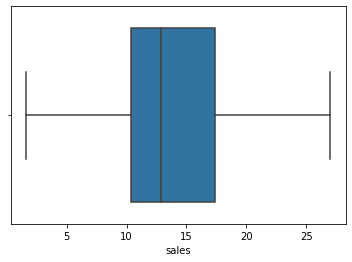

In [19]:
sns.boxplot(df['sales'])
plt.show()

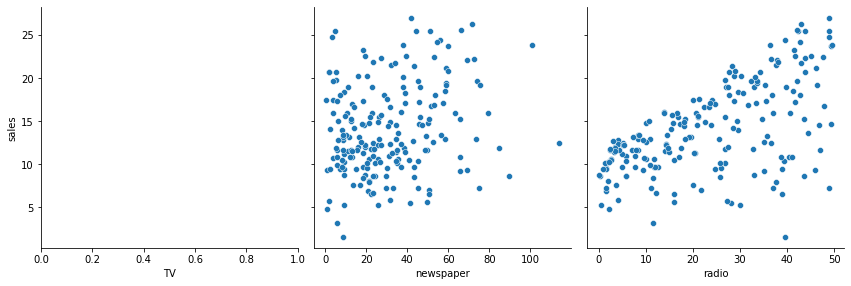

In [20]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

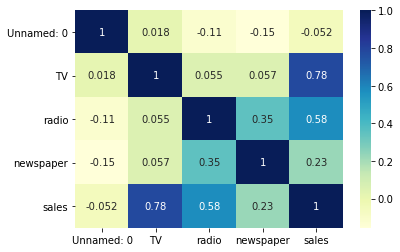

In [21]:
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.show()

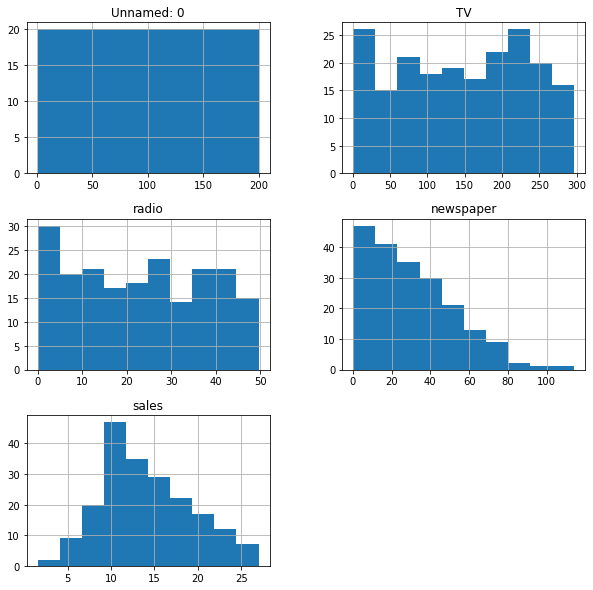

In [22]:
df.hist(bins=10,figsize=(10,10))
plt.show()

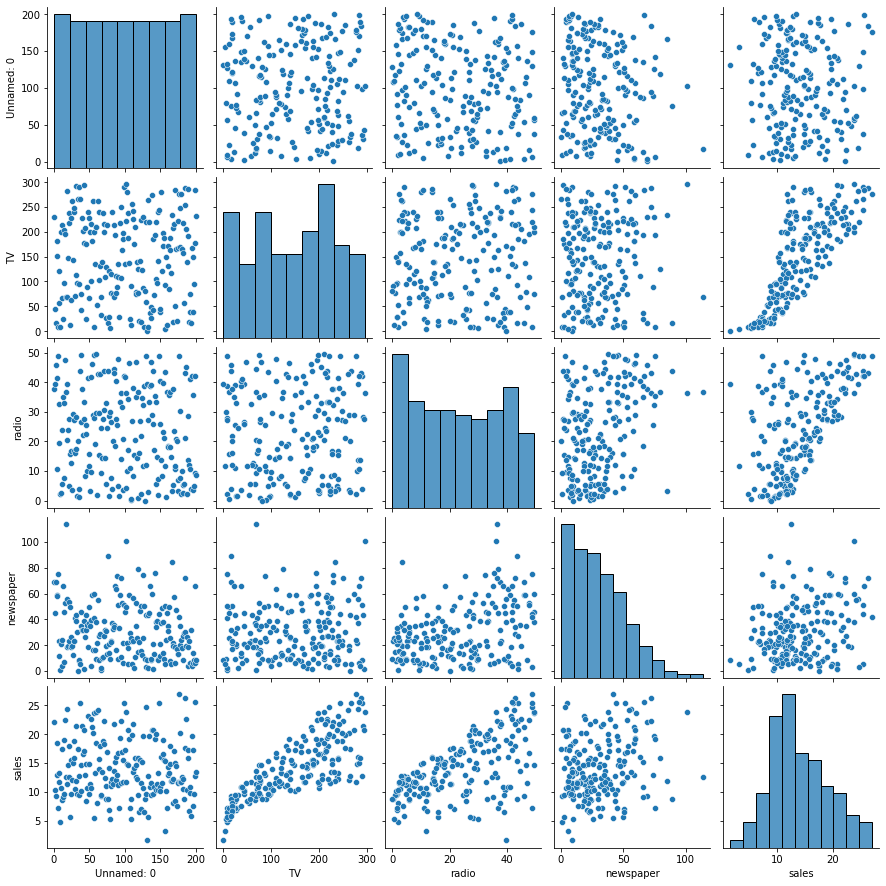

In [23]:
sns.pairplot(df,size=2.5)
plt.show()

In [24]:
feature_cols=df.columns[:3]   
X=df[feature_cols]
result_cols= df.columns[3:]
Y=df[result_cols]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 3)
(120, 2)
(80, 3)
(80, 2)


# Linear Regression

In [25]:
linear = LinearRegression()
linear.fit(X_train,y_train)

print("linear regression bias or intercept   => ",linear.intercept_) 
print("linear regression coefficient         => ",linear.coef_)
print("feature columns                       => ",feature_cols)

linear regression bias or intercept   =>  [24.64703611  2.78429608]
linear regression coefficient         =>  [[-0.04744188 -0.00689085  0.51185679]
 [-0.00112274  0.04796686  0.18130179]]
feature columns                       =>  Index(['Unnamed: 0', 'TV', 'radio'], dtype='object')


In [26]:
y_hat = linear.predict(X_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_hat)))

12.595263602856999


# Root Mean Square error wth TV and radio as features

In [27]:
# Root Mean Square error wth TV and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=df[feature_cols]
    Y=df.sales
    X_train,X_test,y_train,y_test=train_test_split(X,Y)
    linear= LinearRegression()
    linear.fit(X_train,y_train)
    y_hat = linear.predict(X_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6997204156788734

In [28]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=df[feature_cols]
    Y=df.sales
    X_train,X_test,y_train,y_test=train_test_split(X,Y)
    linear = LinearRegression()
    linear.fit(X_train,y_train)
    y_hat = linear.predict(X_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6957913601493353

In [30]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=df[feature_cols]
    Y=df.sales
    X_train,X_test,y_train,y_test=train_test_split(X,Y)
    linear = LinearRegression()
    linear.fit(X_train,y_train)
    y_hat = linear.predict(X_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.9459478437261613

In [33]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=df[feature_cols]
    Y=df.sales
    X_train,X_test,y_train,y_test=train_test_split(X,Y)
    linear = LinearRegression()
    linear.fit(X_train,y_train)
    y_hat = linear.predict(X_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.982131497396994

# Cross Validaiton

In [34]:
feature_cols = ['TV','radio','newspaper']
X=df[feature_cols]
Y=df.sales
linear = LinearRegression()

scores=cross_val_score(linear,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

# the less the better

1.6913531708051797


In [35]:
# with some features
feature_cols = ['TV','radio']
X=df[feature_cols]
Y=df.sales
linear = LinearRegression()

scores=cross_val_score(linear,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6796748419090766


In [36]:
import statsmodels.api as sm
X=df.iloc[:,:-1].values
Y=df.iloc[:, -1].values

In [37]:
X2=sm.add_constant(X)
est=sm.OLS(Y,X2)
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.94e-95
Time:                        19:08:35   Log-Likelihood:                -386.14
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0052      0.394      7.623      0.000       2.228       3.783
x1            -0.0006      0.002     -0.276      0.783      -0.005       0.004
x2             0.0458      0.001     32.725      0.000       0.043       0.049
x3             0.1884      0.009     21.784      0.000       0.171       0.205
x4            -0.0012      0.006     -0.210      0.834      -0.013       0.010
==============================================================================
Omnibus:                       60.267   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.423
Skew:                          -1.325   Prob(JB):                     2.17e-33
Kurtosis:                       6.320   Cond. No.                         653.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value is very Low for Tv and Radio.This means that there is a strong correlation between coffecients and sales. and for newspaper p-value is large so ad spending on newspaper is not significant.

# Saving the model

In [39]:
df=pd.DataFrame(y_hat)
df.to_csv('_y_hat.csv')